In [ ]:
!git clone https://github.com/LimJY03/WineClassification.git

Cloning into 'WineClassification'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 11 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (11/11), 4.23 MiB | 5.43 MiB/s, done.


In [ ]:
!pip install keras_tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 6.0 MB/s eta 0:00:00


In [ ]:
# Import dependencies
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from keras_tuner import RandomSearch
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Dependencies configurations
%matplotlib inline
warnings.filterwarnings("ignore")

In [ ]:
# Read data
red_df = pd.read_csv("./WineClassification/winequality-red.csv", sep=';')
white_df = pd.read_csv("./WineClassification/winequality-white.csv", sep=';')

In [ ]:
# Preview red wine data
red_df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [ ]:
# Preview white wine data
white_df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
4         9.9        6  
...       ...      ...  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6  

[4898 rows x 12 columns]

In [ ]:
# Statistics of red wine
red_df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [ ]:
# Statistics of white wine
white_df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

In [ ]:
# Check datatype
print(f'Red Wine Data: {red_df.dtypes}')
print(f'White Wine Data: {white_df.dtypes}')

Red Wine Data: fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object
White Wine Data: fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [ ]:
# Data cleaning
red_df.drop_duplicates()
white_df.drop_duplicates()

print(f'Red Wine Null Count:\n{red_df.isnull().sum()}\n')
print(f'White Wine Null Count:\n{white_df.isnull().sum()}\n')

Red Wine Null Count:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

White Wine Null Count:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64



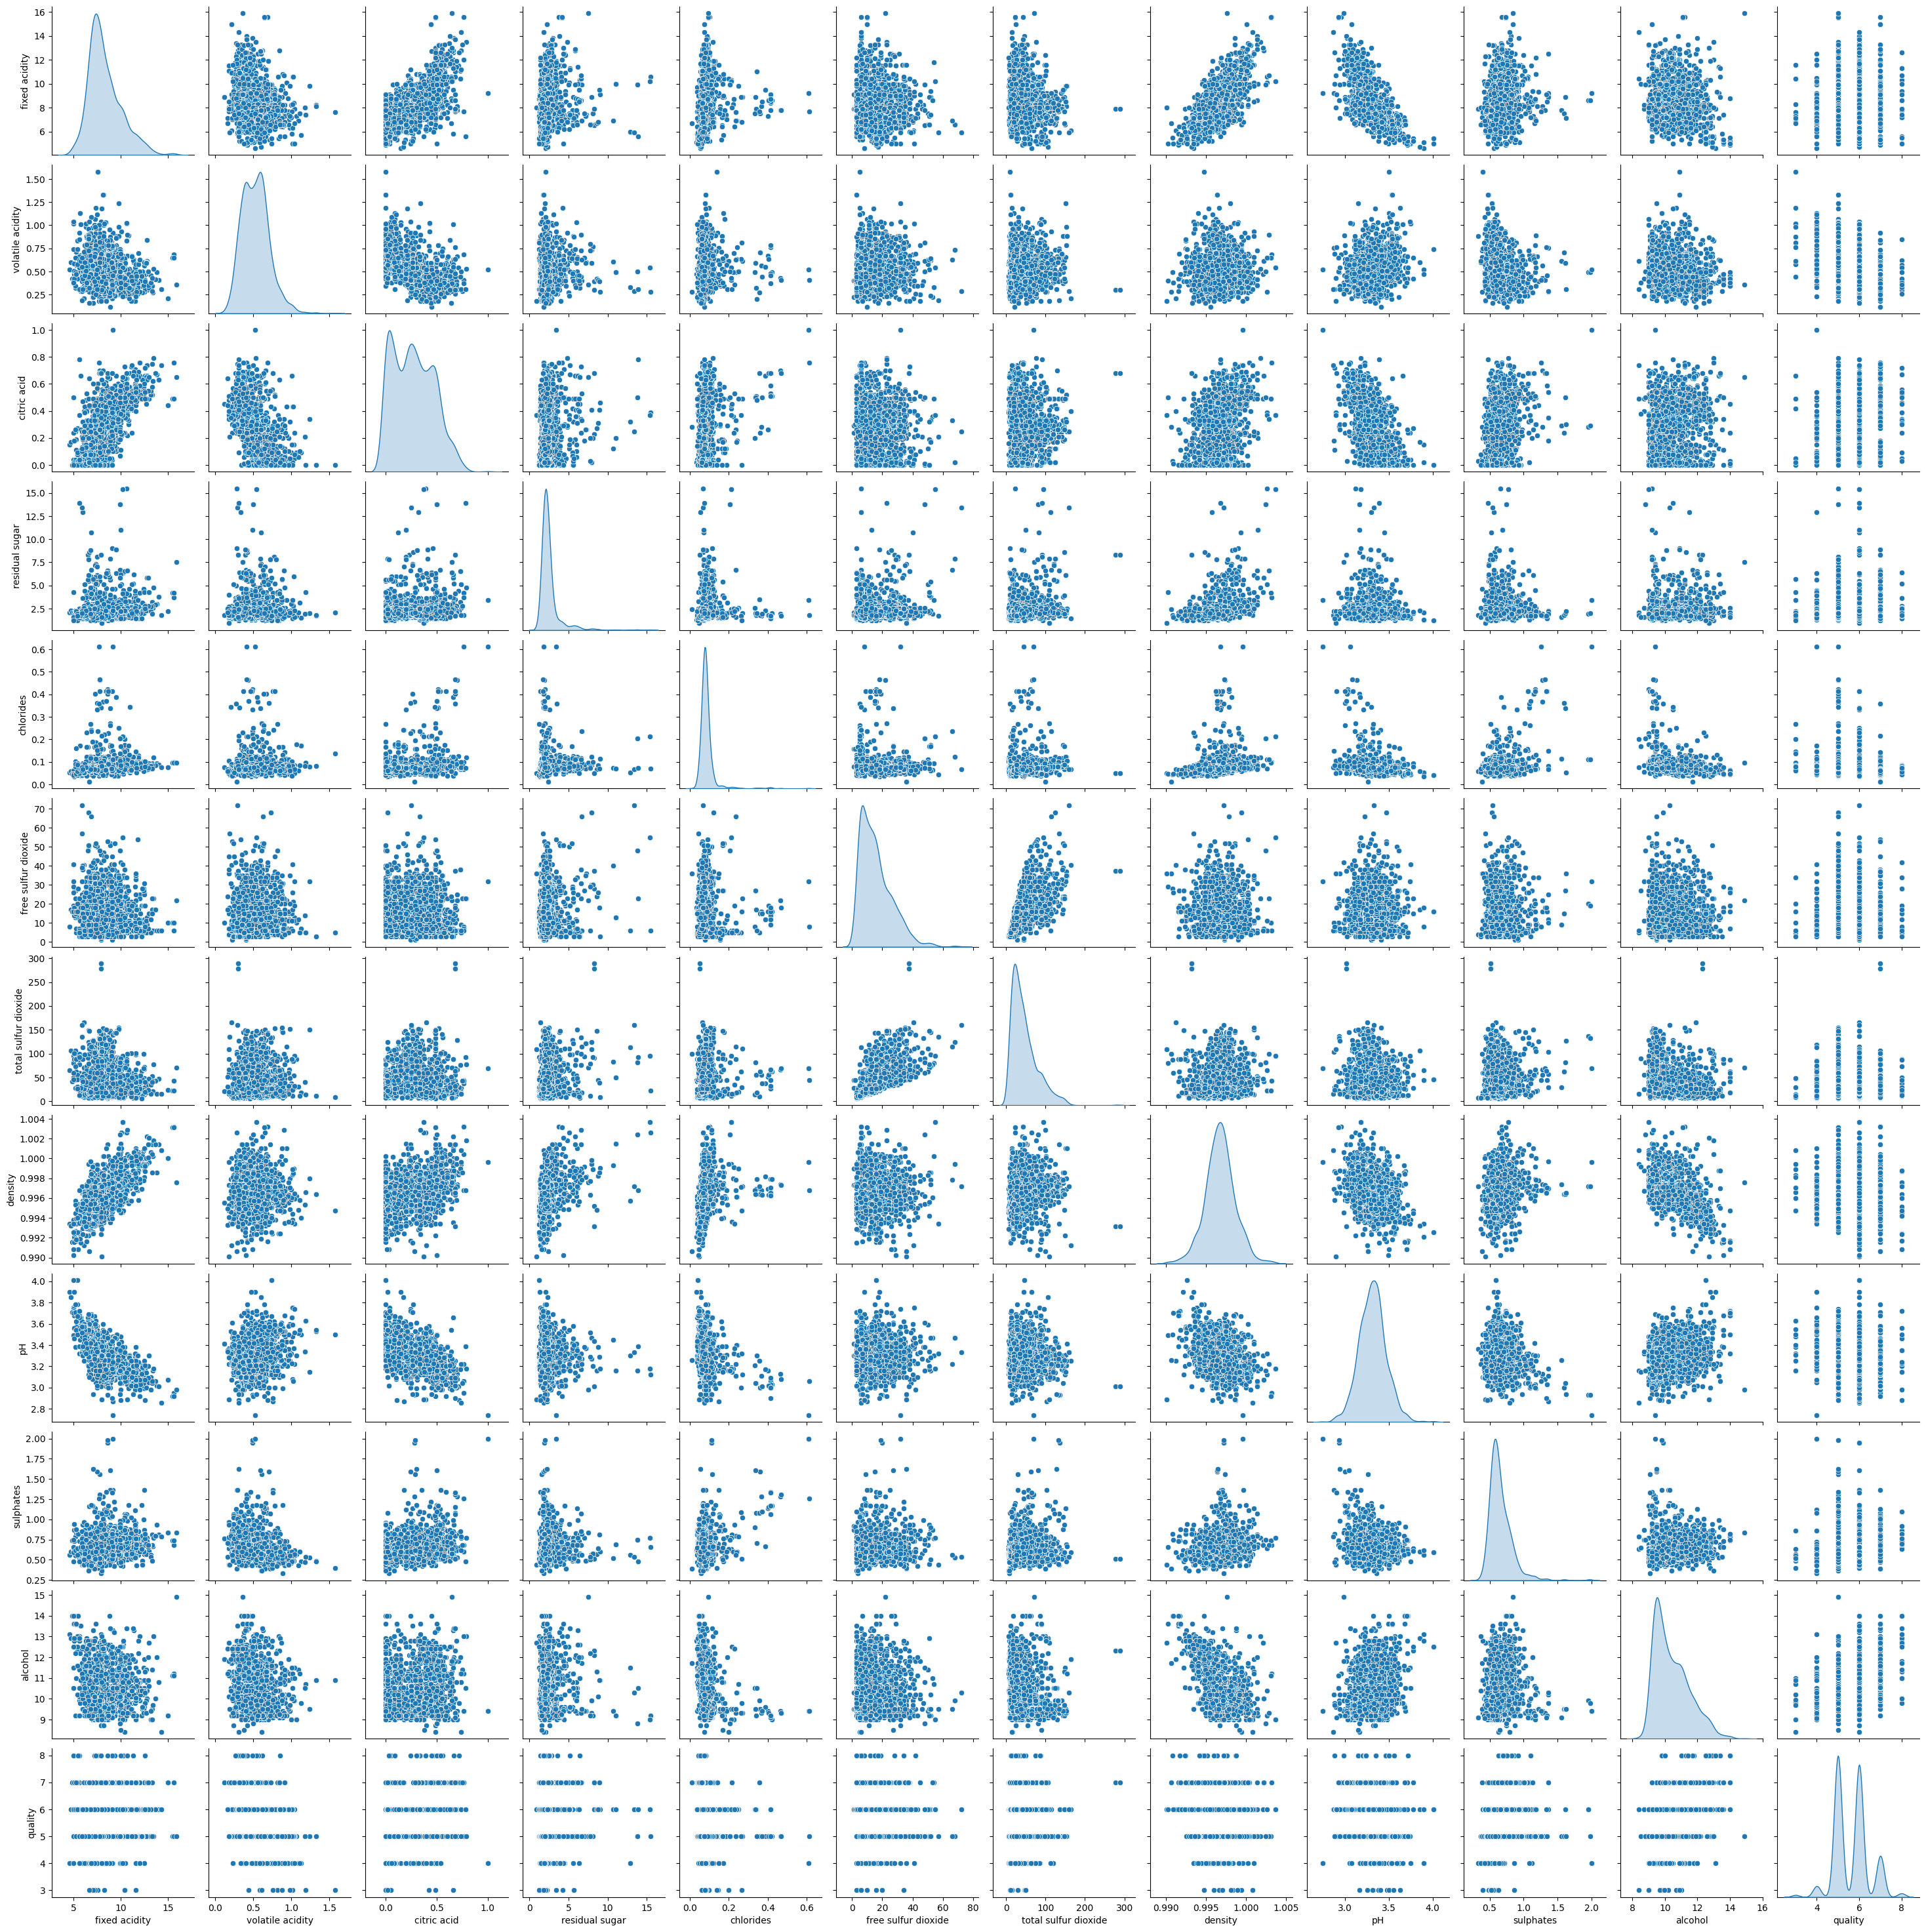

In [ ]:
# Red wine pairplots
sns.pairplot(data=red_df, diag_kind='kde')

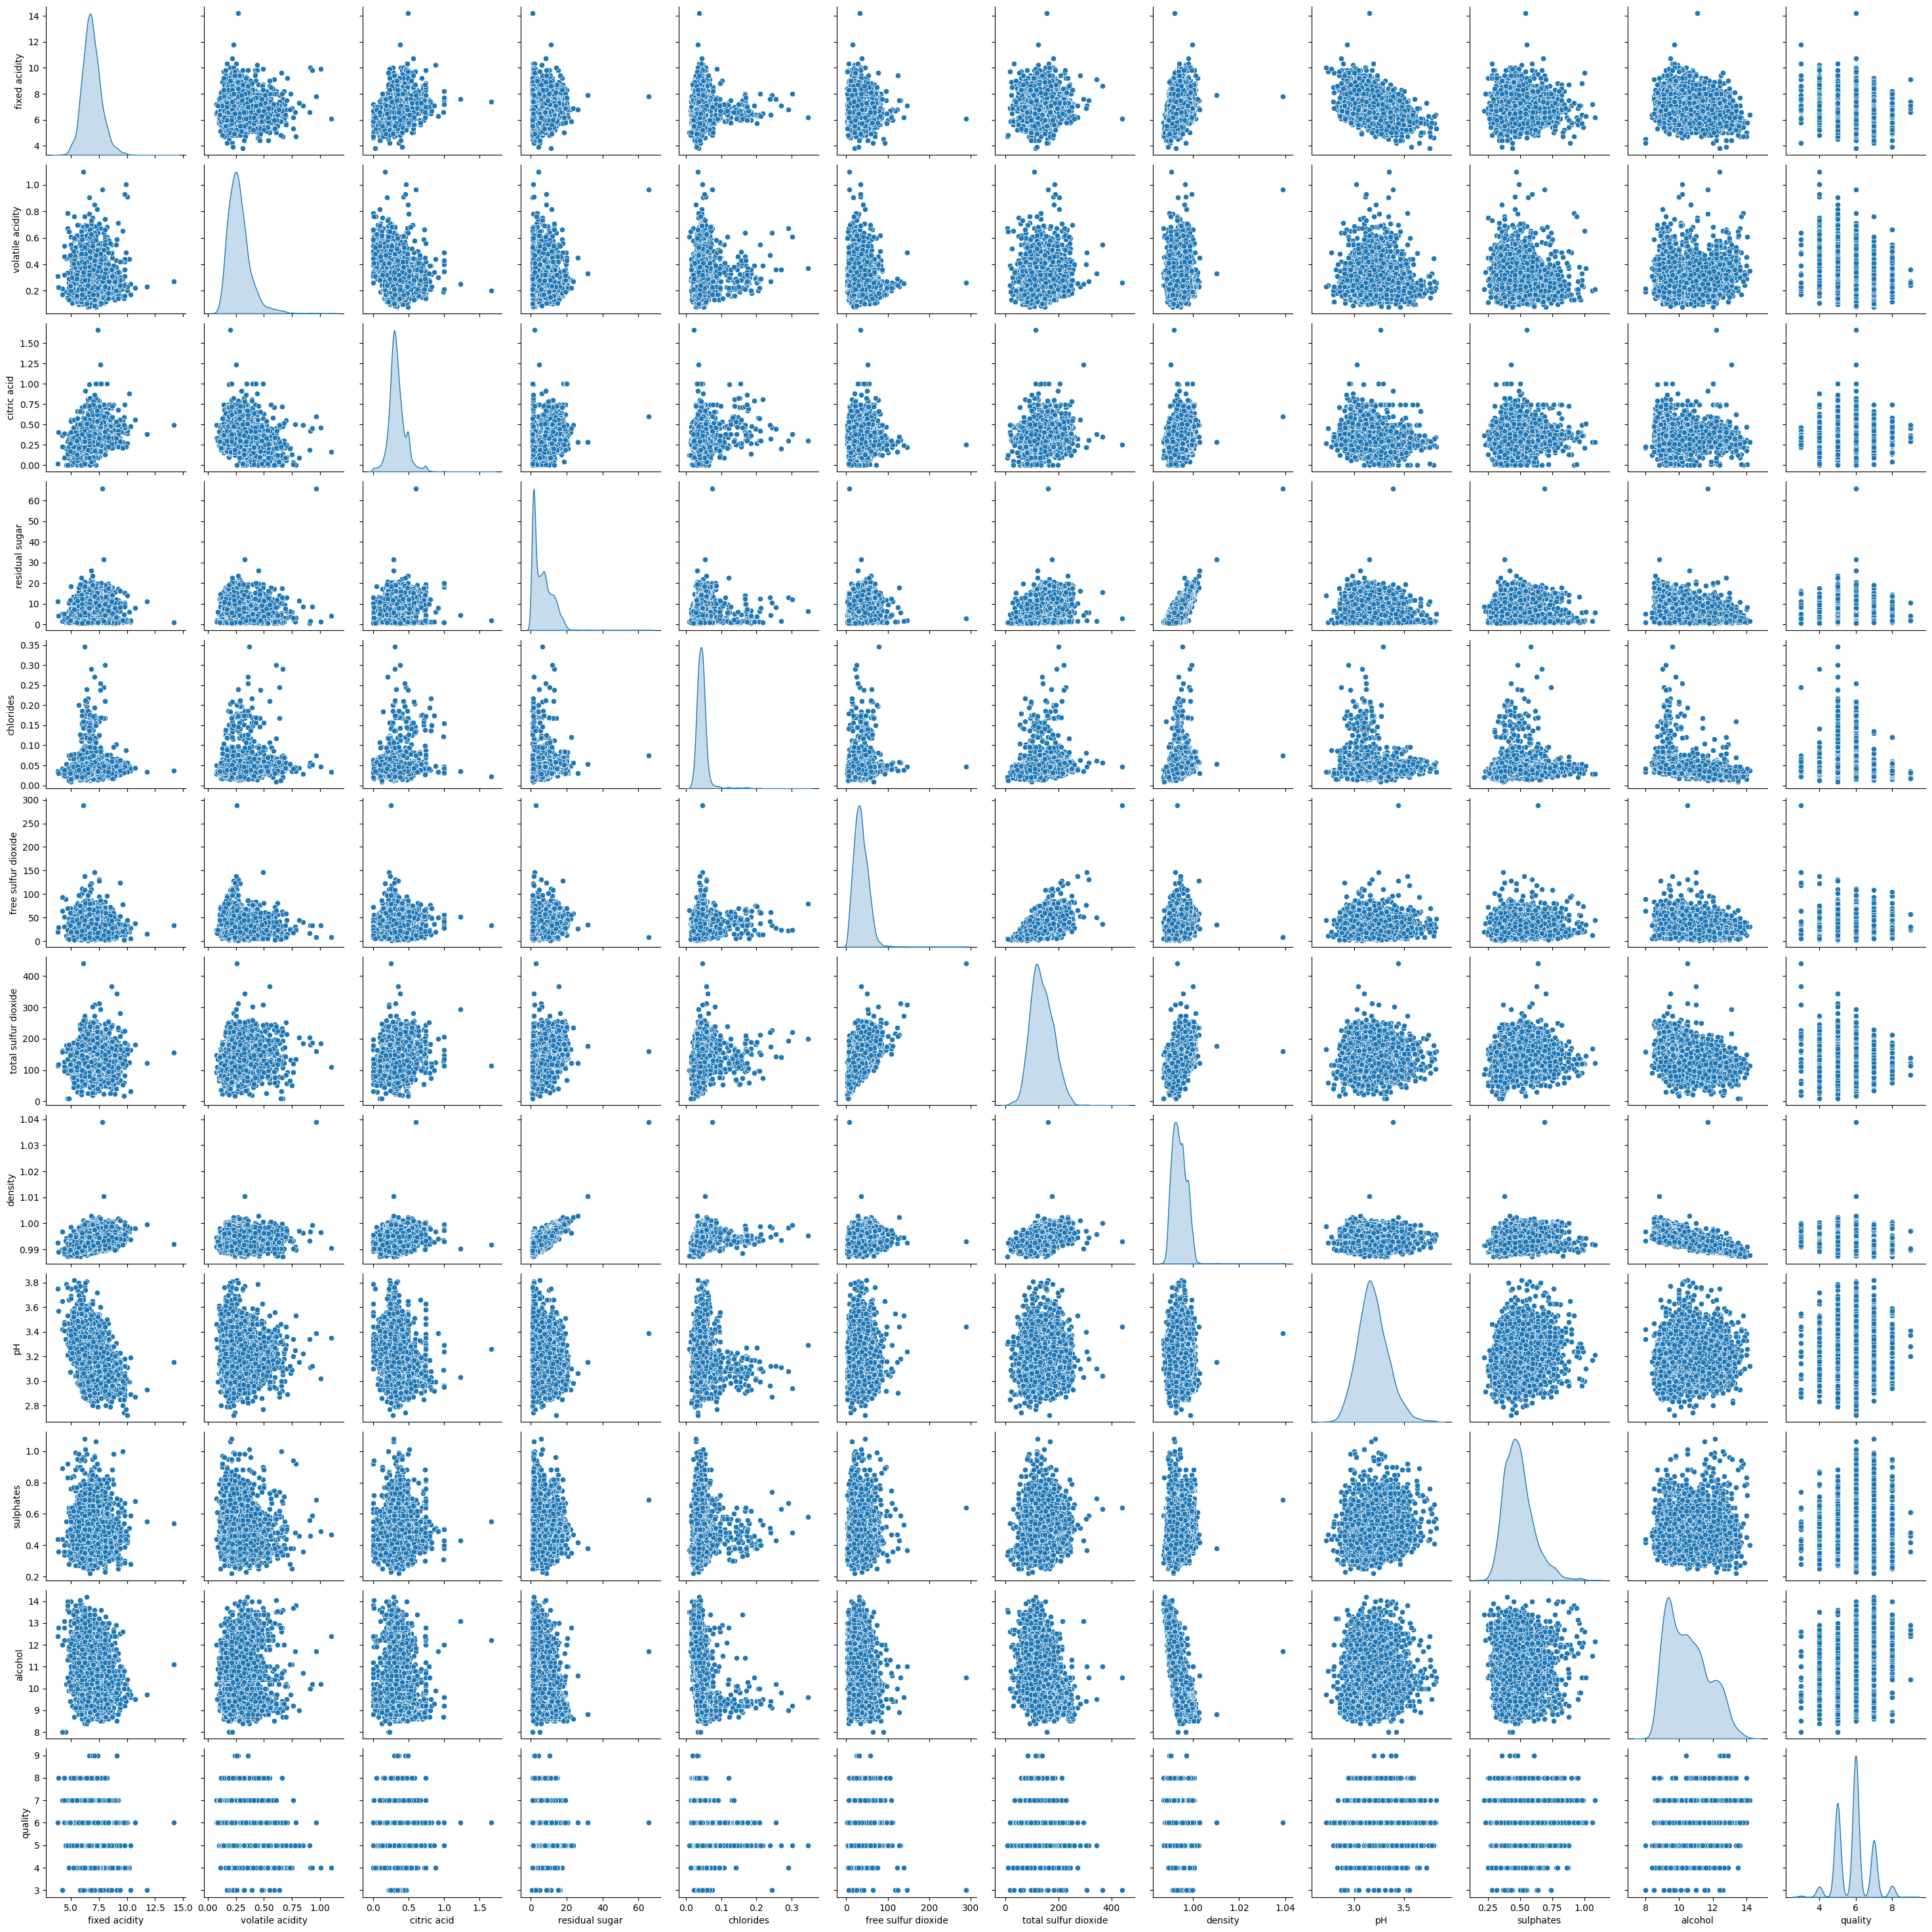

In [ ]:
# White wine pairplots
sns.pairplot(data=white_df, diag_kind='kde')

In [ ]:
# Setting wine class
red_df['class'] = 0
white_df['class'] = 1

# Combining dataframe
wine_df = red_df.append(white_df, ignore_index=True)
wine_df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  class  
0         9.4        5      0  
1         9.8        5      0  
2         9.8        5      0  
3         9.8        6      0  
4         9.4        5      0  
...       ...      ...    ...  
6492     11.2        6      1  
6493      9.6        5      1  
6494      9.4        6      1  
6495     12.8        7      1  
6496     11.8        6      1  

[6497 rows x 13 columns]

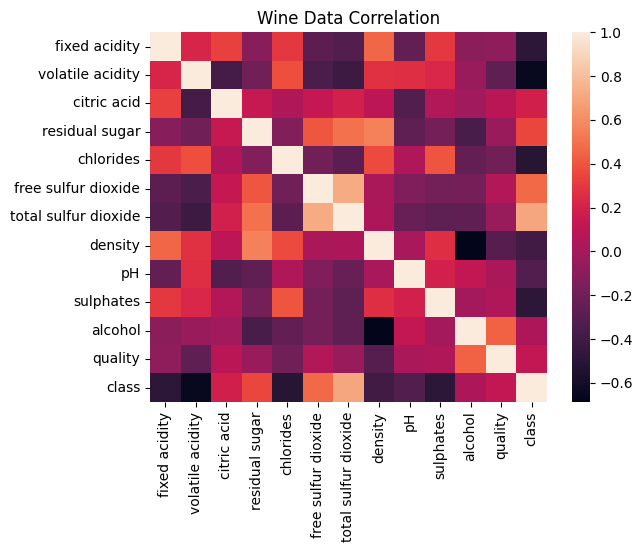

In [ ]:
# Plot correlations
sns.heatmap(wine_df.corr())
plt.title("Wine Data Correlation")
plt.show()

In [ ]:
# Feature target split
X = wine_df.copy()
y = X.pop('class').to_numpy()

In [ ]:
# Train test split -> 60% train, 20% validate, 20% test
X_train, X_testval, y_train, y_testval = train_test_split(X, y, test_size=0.4, random_state=1006) 
X_val, X_test, y_val, y_test = train_test_split(X_testval, y_testval, test_size=0.5, random_state=1006) 

In [ ]:
# Scale data
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_val = standard_scaler.transform(X_val)
X_test = standard_scaler.transform(X_test)

In [ ]:
class NeuralNet:

    def __init__(self, model, model_name):
        self.model = model
        self.model_name = model_name
        self.history = None

    def fit(self, optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001)):
        self.model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
        performance = self.model.fit(X_train, y_train, epochs=50, batch_size=32,
                                     callbacks=[early_stopping],
                                     validation_data=(X_val, y_val))
        self.history = performance.history

In [ ]:
# Model building
neural_nets = [
    NeuralNet(model=tf.keras.Sequential([
        tf.keras.layers.Dense(12, activation='sigmoid', input_shape=(12,)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]), model_name='12-1 Sequential Net'),
    NeuralNet(model=tf.keras.Sequential([
        tf.keras.layers.Dense(16, activation='relu', input_shape=(12,)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]), model_name='16-1 Sequential Net'),
    NeuralNet(model=tf.keras.Sequential([
        tf.keras.layers.Dense(12, activation='sigmoid', input_shape=(12,)),
        tf.keras.layers.Dense(8, activation='sigmoid'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]), model_name='12-8-1 Sequential Net'),
    NeuralNet(model=tf.keras.Sequential([
        tf.keras.layers.Dense(16, activation='relu', input_shape=(12,)),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]), model_name='16-4-1 Sequential Net'),
    NeuralNet(model=tf.keras.Sequential([
        tf.keras.layers.Dense(8, activation='relu', input_shape=(12,)),
        tf.keras.layers.Dense(8, activation='relu', input_shape=(12,)),
        tf.keras.layers.Dense(8, activation='relu', input_shape=(12,)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]), model_name='8-8-8-1 Sequential Net')
]

In [ ]:
for net in neural_nets: 
    print(f'\n{net.model_name}:')
    net.fit()


12-1 Sequential Net:
Epoch 1/50
122/122 [==============================] - 1s 4ms/step - loss: 0.9378 - accuracy: 0.2522 - val_loss: 0.7074 - val_accuracy: 0.3272
Epoch 2/50
122/122 [==============================] - 0s 2ms/step - loss: 0.5594 - accuracy: 0.8325 - val_loss: 0.4486 - val_accuracy: 0.9561
Epoch 3/50
122/122 [==============================] - 0s 2ms/step - loss: 0.3745 - accuracy: 0.9782 - val_loss: 0.3204 - val_accuracy: 0.9692
Epoch 4/50
122/122 [==============================] - 0s 2ms/step - loss: 0.2778 - accuracy: 0.9823 - val_loss: 0.2482 - val_accuracy: 0.9784
Epoch 5/50
122/122 [==============================] - 0s 2ms/step - loss: 0.2188 - accuracy: 0.9854 - val_loss: 0.2010 - val_accuracy: 0.9846
Epoch 6/50
122/122 [==============================] - 0s 2ms/step - loss: 0.1782 - accuracy: 0.9877 - val_loss: 0.1673 - val_accuracy: 0.9869
Epoch 7/50
122/122 [==============================] - 0s 2ms/step - loss: 0.1485 - accuracy: 0.9887 - val_loss: 0.1424 - val_a

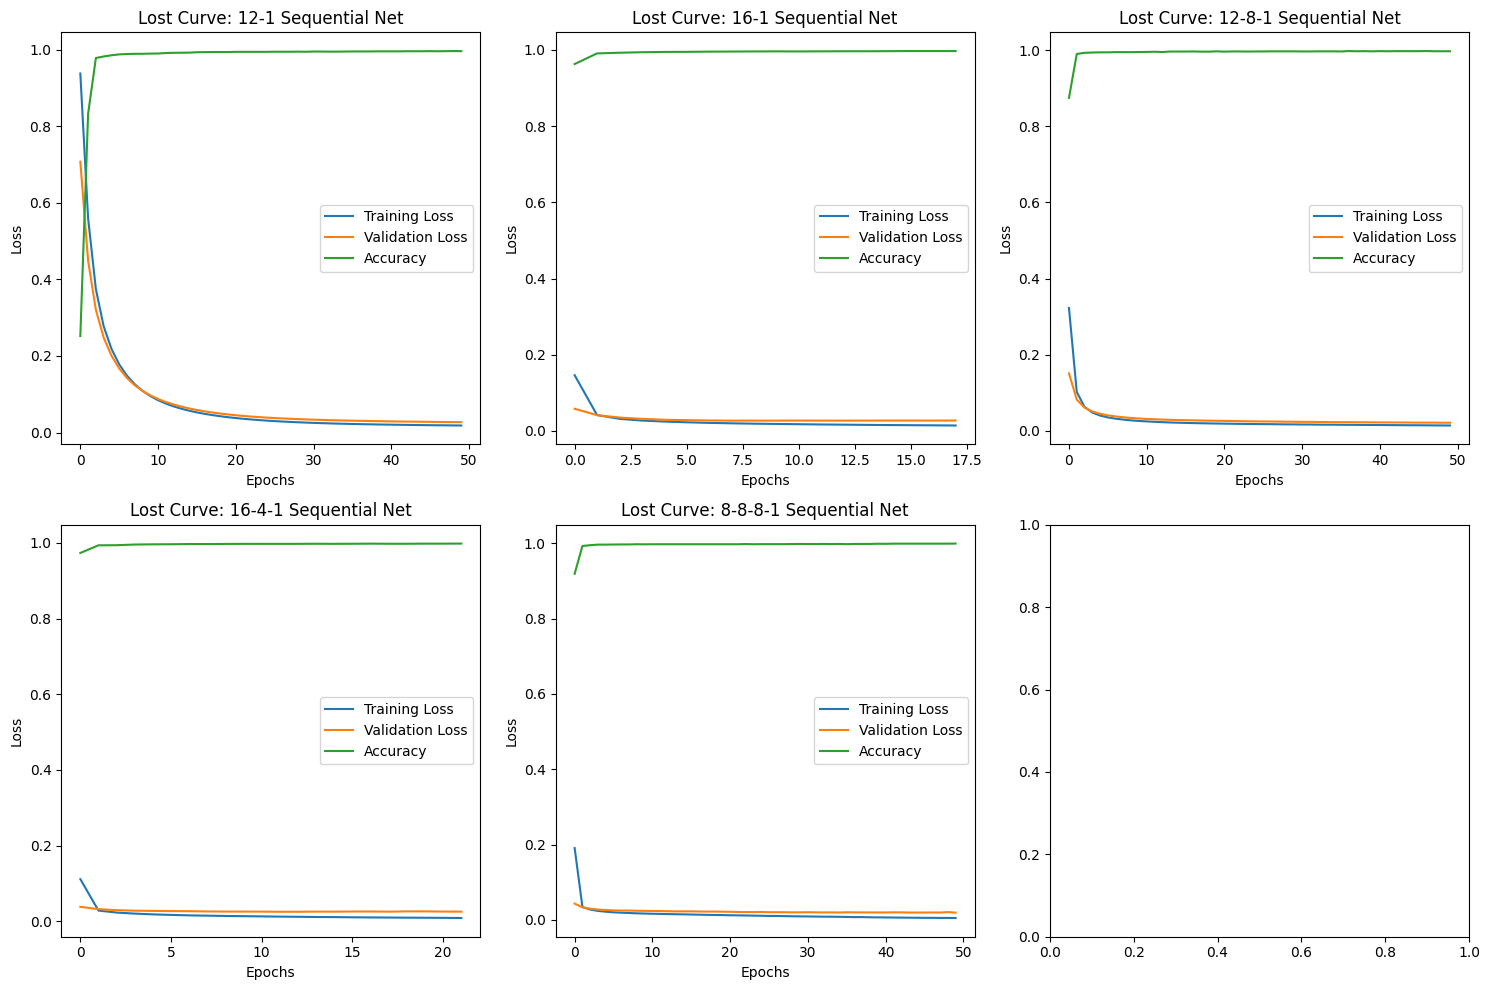

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

for i, net in enumerate(neural_nets):
    ax_model_perf = ax[i // 3, i % 3]
    ax_model_perf.plot(net.history['loss'], label='Training Loss')
    ax_model_perf.plot(net.history['val_loss'], label='Validation Loss')
    ax_model_perf.plot(net.history['accuracy'], label='Accuracy')
    ax_model_perf.set_xlabel('Epochs')
    ax_model_perf.set_ylabel('Loss')
    ax_model_perf.legend()
    ax_model_perf.set_title(f'Lost Curve: {net.model_name}')

plt.tight_layout()
plt.show()

In [ ]:
def build_model(hp):

    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=hp.Int('units_1', min_value=32, max_value=512, step=32),
                              activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(units=hp.Int(f'units_2', min_value=32, max_value=512, step=32),
                              activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    optimizer_name = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop'])
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    optimizer = tf.keras.optimizers.get(optimizer_name)
    optimizer.learning_rate.assign(learning_rate)
    
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [ ]:
tf.keras.backend.clear_session()

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

tuner = RandomSearch(
    build_model, objective='val_accuracy',
    max_trials=30, executions_per_trial=3,
)

tuner.search(
    X_train, y_train, epochs=5,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

Trial 30 Complete [00h 00m 18s]
val_accuracy: 0.9971773227055868

Best val_accuracy So Far: 0.9971773227055868
Total elapsed time: 00h 07m 27s


In [ ]:
hyperparameters = tuner.get_best_hyperparameters(num_trials=10)

results= []

best_val_accuracy = 0.0
best_units_1 = None
best_units_2 = None
best_optimizer = None
best_learning_rate = None

for trial, params in enumerate(hyperparameters):

    units_1 = params.get('units_1')
    units_2 = params.get('units_2')
    optimizer = params.get('optimizer')
    learning_rate = params.get('learning_rate')
    model = build_model(params)

    model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

    val_loss, val_accuracy = model.evaluate(X_val, y_val)
    
    results.append({
        'Trial': trial + 1, 
        'Units_1': units_1, 
        'Units_2': units_2,
        'Optimizer': optimizer, 
        'Learning-rate': learning_rate,
        'Val Accuracy': val_accuracy
    })
    
    if (val_accuracy > best_val_accuracy):
        best_val_accuracy = val_accuracy
        best_units_1 = units_1
        best_units_2 = units_2
        best_optimizer = optimizer
        best_learning_rate = learning_rate

Epoch 1/5
122/122 [==============================] - 1s 6ms/step - loss: 0.0681 - accuracy: 0.9831 - val_loss: 0.0277 - val_accuracy: 0.9946
Epoch 2/5
122/122 [==============================] - 1s 4ms/step - loss: 0.0184 - accuracy: 0.9956 - val_loss: 0.0236 - val_accuracy: 0.9954
Epoch 3/5
122/122 [==============================] - 1s 4ms/step - loss: 0.0131 - accuracy: 0.9974 - val_loss: 0.0216 - val_accuracy: 0.9969
Epoch 4/5
122/122 [==============================] - 1s 4ms/step - loss: 0.0102 - accuracy: 0.9982 - val_loss: 0.0242 - val_accuracy: 0.9962
Epoch 5/5
41/41 [==============================] - 0s 2ms/step - loss: 0.0247 - accuracy: 0.9969
Epoch 1/5
122/122 [==============================] - 1s 5ms/step - loss: 0.0534 - accuracy: 0.9903 - val_loss: 0.0348 - val_accuracy: 0.9915
Epoch 2/5
122/122 [==============================] - 0s 4ms/step - loss: 0.0193 - accuracy: 0.9959 - val_loss: 0.0252 - val_accuracy: 0.9938
Epoch 3/5
122/122 [==============================] - 0s 4

In [ ]:
results_df = pd.DataFrame(results)

In [ ]:
print("Best Hyperparameter Configuration")
print(f"Units_1 : {best_units_1}")
print(f"Units_2 : {best_units_2}")
print(f"Optimizer: {best_optimizer}")
print(f"Learning-rate: {best_learning_rate}")

Best Hyperparameter Configuration
Units_1 : 128
Units_2 : 448
Optimizer: adam
Learning-rate: 0.001


In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]

In [ ]:
y_pred = best_model.predict(X_test)
y_pred = (y_pred > 0.5)

print(f'{confusion_matrix(y_test, y_pred)}\n')
print(f'Classification Report: {classification_report(y_test, y_pred)}\n')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

41/41 [==============================] - 0s 2ms/step
[[306  11]
 [  1 982]]

Classification Report:               precision    recall  f1-score   support

           0       1.00      0.97      0.98       317
           1       0.99      1.00      0.99       983

    accuracy                           0.99      1300
   macro avg       0.99      0.98      0.99      1300
weighted avg       0.99      0.99      0.99      1300


Accuracy: 0.9907692307692307


In [ ]:
pd.DataFrame(confusion_matrix(y_test, y_pred, labels=[0, 1]), 
             index=['true:White', 'true:Red'], 
             columns=['pred:White', 'pred:Red']
            )

pred:White  pred:Red
true:White         306        11
true:Red             1       982

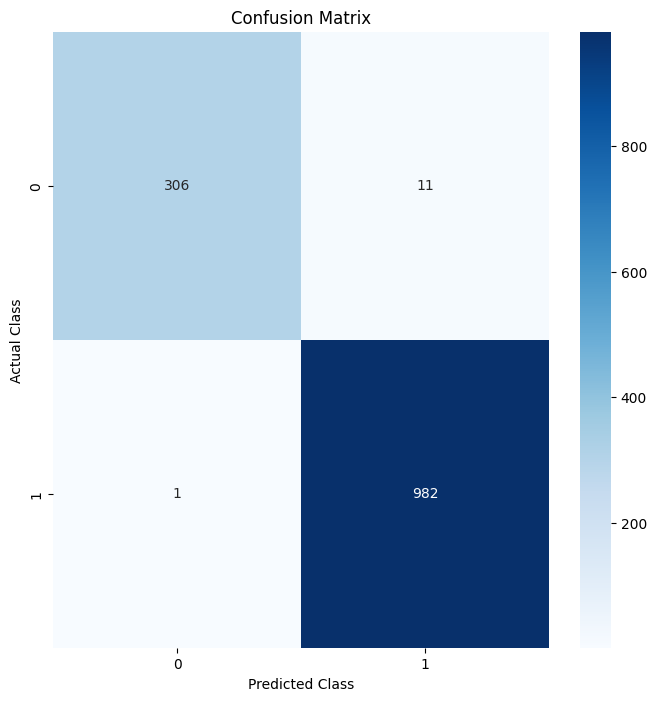

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

In [ ]:
y_test_prob = best_model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
auc_score = roc_auc_score(y_test, y_test_prob)

41/41 [==============================] - 0s 2ms/step


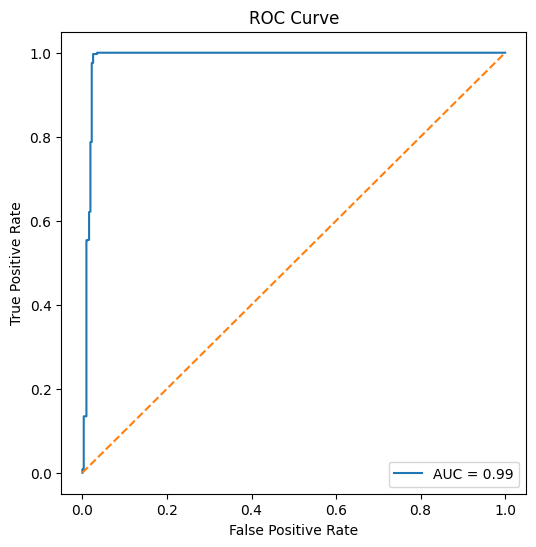

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

In [ ]:
y_pred = np.round(best_model.predict(X_test))

loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy  : %.5f' % acc)
print('Test Loss      : %.5f' % loss)

loss, acc = model.evaluate(X_train, y_train, verbose=0)
print('Train Accuracy : %.5f' % acc)
print('Train Loss     : %.5f' % loss)

41/41 [==============================] - 0s 2ms/step
Test Accuracy  : 0.99308
Test Loss      : 0.06095
Train Accuracy : 0.99769
Train Loss     : 0.01005
